In [2]:
import pandas as pd
import numpy as np
from scipy.cluster.vq import kmeans2
from matplotlib import pyplot as plt

In [4]:
iris = pd.read_csv("iris.csv")

In [27]:
iris

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
features = ["Sepal Length (cm)", "Sepal Width (cm)", "Petal Length (cm)", "Petal Width (cm)"]

In [9]:
iris = iris.dropna(subset=features)

In [10]:
data = iris[features].copy()

In [11]:
data

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [13]:
data.describe()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,4.858333,4.952500,5.208136,5.120000
std,2.070165,1.625979,2.691489,2.861853
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,4.000000,1.915254,1.750000
50%,4.750000,4.750000,6.110169,5.500000
75%,6.250000,5.875000,7.254237,7.375000
max,10.000000,10.000000,10.000000,10.000000


In [14]:
data.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
0,3.00,6.625,1.610169,1.375
1,2.50,4.750,1.610169,1.375
2,2.00,5.500,1.457627,1.375
3,1.75,5.125,1.762712,1.375
4,2.75,7.000,1.610169,1.375


[[5.94642857 4.39285714 6.96368039 6.90178571]
 [2.04545455 5.125      1.66563945 1.34090909]
 [4.25       3.21370968 5.64024057 5.27016129]
 [3.33035714 7.25446429 1.7409201  1.69642857]
 [7.74074074 5.29166667 8.46327684 8.80555556]]


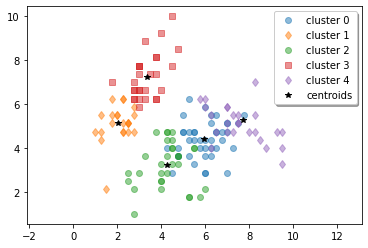

In [25]:
k = 5
dataset = np.asarray(data)
centroid, label = kmeans2(dataset, k, minit='points') 
print(centroid)

w0 = dataset[label == 0]
w1 = dataset[label == 1]
w2 = dataset[label == 2]
w3 = dataset[label == 3]
w4 = dataset[label == 4]

plt.plot(w0[:, 0], w0[:, 1], 'o', alpha=0.5, label='cluster 0')
plt.plot(w1[:, 0], w1[:, 1], 'd', alpha=0.5, label='cluster 1')
plt.plot(w2[:, 0], w2[:, 1], 'o', alpha=0.5, label='cluster 2')
plt.plot(w3[:, 0], w3[:, 1], 's', alpha=0.5, label='cluster 3')
plt.plot(w4[:, 0], w4[:, 1], 'd', alpha=0.5, label='cluster 4')
plt.plot(centroid[:, 0], centroid[:, 1], 'k*', label='centroids')
plt.axis('equal')
plt.legend(shadow=True)
plt.show()

[[2.765      6.3175     1.70779661 1.54      ]
 [7.60833333 5.2375     8.37288136 8.75      ]
 [5.84302326 4.24418605 6.88884509 6.72093023]
 [4.11111111 3.23611111 5.49717514 5.16666667]]


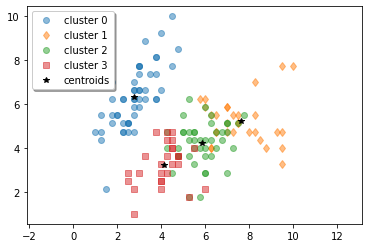

In [21]:
k = 4
dataset = np.asarray(data)
centroid, label = kmeans2(dataset, k, minit='points') 
print(centroid)

w0 = dataset[label == 0]
w1 = dataset[label == 1]
w2 = dataset[label == 2]
w3 = dataset[label == 3]

plt.plot(w0[:, 0], w0[:, 1], 'o', alpha=0.5, label='cluster 0')
plt.plot(w1[:, 0], w1[:, 1], 'd', alpha=0.5, label='cluster 1')
plt.plot(w2[:, 0], w2[:, 1], 'o', alpha=0.5, label='cluster 2')
plt.plot(w3[:, 0], w3[:, 1], 's', alpha=0.5, label='cluster 3')
plt.plot(centroid[:, 0], centroid[:, 1], 'k*', label='centroids')
plt.axis('equal')
plt.legend(shadow=True)
plt.show()

[[2.765      6.3175     1.70779661 1.54      ]
 [4.97131148 3.76639344 6.18143929 5.94262295]
 [7.36538462 5.05769231 8.17340287 8.42307692]]


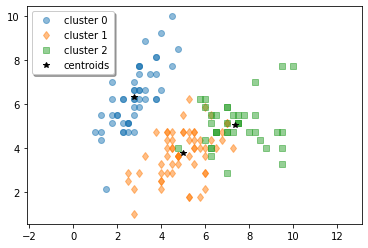

In [23]:
k = 3
dataset = np.asarray(data)
centroid, label = kmeans2(dataset, k, minit = 'points') 
print (centroid)

w0 = dataset[label == 0]
w1 = dataset[label == 1]
w2 = dataset[label == 2]
plt.plot(w0[:, 0], w0[:, 1], 'o', alpha=0.5, label = 'cluster 0')
plt.plot(w1[:, 0], w1[:, 1], 'd', alpha=0.5, label = 'cluster 1')
plt.plot(w2[:, 0], w2[:, 1], 's', alpha=0.5, label = 'cluster 2')
plt.plot(centroid[:, 0], centroid[:, 1], 'k*', label = 'centroids')
plt.axis('equal')
plt.legend(shadow = True)
plt.show()

[[2.765      6.3175     1.70779661 1.54      ]
 [5.905      4.27       6.95830508 6.91      ]]


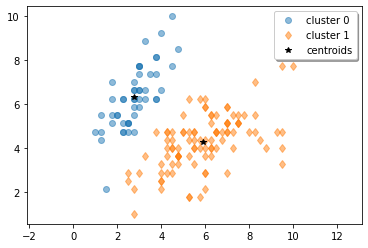

In [26]:
k = 2
dataset = np.asarray(data)
centroid, label = kmeans2(dataset, k, minit = 'points') 
print (centroid)

w0 = dataset[label == 0]
w1 = dataset[label == 1]
plt.plot(w0[:, 0], w0[:, 1], 'o', alpha=0.5, label = 'cluster 0')
plt.plot(w1[:, 0], w1[:, 1], 'd', alpha=0.5, label = 'cluster 1')
plt.plot(centroid[:, 0], centroid[:, 1], 'k*', label = 'centroids')
plt.axis('equal')
plt.legend(shadow = True)
plt.show()